In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from scipy import stats

from scipy.stats import norm
from scipy.stats import t

In [3]:
control = pd.read_csv('control_group.csv', sep = ';')
test =pd.read_csv('test_group.csv', sep = ';')

In [4]:
control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.Data Cleaning

In [5]:

columns = control.columns.to_list()
columns
#for i in columns:
#    if i.startswith('#'):
#         i.replace('# of ','')
new_cols = [ i.replace('# of ','') if i.startswith('#')  else i for i in columns  ]  
new_cols

['Campaign Name',
 'Date',
 'Spend [USD]',
 'Impressions',
 'Reach',
 'Website Clicks',
 'Searches',
 'View Content',
 'Add to Cart',
 'Purchase']

In [6]:
#rename the columns to formatted ones
#for all the columns
control.columns = new_cols

In [7]:
control.head()

,Campaign Name,Date,Spend [USD],Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#for single column formatting
control.rename(columns={'Spend [USD]':'Spend $'}, inplace=True)

In [9]:
# Do the same formatting for test_group
test.columns =  new_cols
test.rename(columns={'Spend [USD]':'Spend $'}, inplace =True)

In [10]:
test.head()

,Campaign Name,Date,Spend $,Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [11]:
##finding missing values
control.isnull().sum()
#1 null value

Campaign Name     0
Date              0
Spend $           0
Impressions       1
Reach             1
Website Clicks    1
Searches          1
View Content      1
Add to Cart       1
Purchase          1
dtype: int64

In [12]:
test.isnull().sum()

Campaign Name     0
Date              0
Spend $           0
Impressions       0
Reach             0
Website Clicks    0
Searches          0
View Content      0
Add to Cart       0
Purchase          0
dtype: int64

In [13]:
control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Campaign Name   30 non-null     object 
 1   Date            30 non-null     object 
 2   Spend $         30 non-null     int64  
 3   Impressions     29 non-null     float64
 4   Reach           29 non-null     float64
 5   Website Clicks  29 non-null     float64
 6   Searches        29 non-null     float64
 7   View Content    29 non-null     float64
 8   Add to Cart     29 non-null     float64
 9   Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Campaign Name   30 non-null     object
 1   Date            30 non-null     object
 2   Spend $         30 non-null     int64 
 3   Impressions     30 non-null     int64 
 4   Reach           30 non-null     int64 
 5   Website Clicks  30 non-null     int64 
 6   Searches        30 non-null     int64 
 7   View Content    30 non-null     int64 
 8   Add to Cart     30 non-null     int64 
 9   Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [15]:
#since there is only one na value , we can drop it 
control = control.dropna()

In [16]:
#replace the . with / for each date
control['Date'] = control['Date'].apply(lambda x: x.replace('.','/'))
control['Date']

0      1/08/2019
1      2/08/2019
2      3/08/2019
3      4/08/2019
5      6/08/2019
6      7/08/2019
7      8/08/2019
8      9/08/2019
9     10/08/2019
10    11/08/2019
11    12/08/2019
12    13/08/2019
13    14/08/2019
14    15/08/2019
15    16/08/2019
16    17/08/2019
17    18/08/2019
18    19/08/2019
19    20/08/2019
20    21/08/2019
21    22/08/2019
22    23/08/2019
23    24/08/2019
24    25/08/2019
25    26/08/2019
26    27/08/2019
27    28/08/2019
28    29/08/2019
29    30/08/2019
Name: Date, dtype: object

In [17]:
#do the same for test
test['Date'] = test['Date'].apply(lambda x: x.replace('.','/'))
test['Date']

0      1/08/2019
1      2/08/2019
2      3/08/2019
3      4/08/2019
4      5/08/2019
5      6/08/2019
6      7/08/2019
7      8/08/2019
8      9/08/2019
9     10/08/2019
10    11/08/2019
11    12/08/2019
12    13/08/2019
13    14/08/2019
14    15/08/2019
15    16/08/2019
16    17/08/2019
17    18/08/2019
18    19/08/2019
19    20/08/2019
20    21/08/2019
21    22/08/2019
22    23/08/2019
23    24/08/2019
24    25/08/2019
25    26/08/2019
26    27/08/2019
27    28/08/2019
28    29/08/2019
29    30/08/2019
Name: Date, dtype: object

In [18]:
control

,Campaign Name,Date,Spend $,Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
0,Control Campaign,1/08/2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2/08/2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3/08/2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4/08/2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
5,Control Campaign,6/08/2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
6,Control Campaign,7/08/2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
7,Control Campaign,8/08/2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
8,Control Campaign,9/08/2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
9,Control Campaign,10/08/2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
10,Control Campaign,11/08/2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


# 2.Understanding the data

In [19]:
test.describe()

,Spend $,Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


In [20]:
control.describe()

,Spend $,Impressions,Reach,Website Clicks,Searches,View Content,Add to Cart,Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


1. The customer engagement metrics are similar in both the cases.  
2. The amount spend on test group campaign looks slightly more
3. Control groups has made more impressions on average, which might be the reason for reach as well compared to test
4. To understand whether the test campaigns are truley impactful, we would need a hypothesis

# 3.Test Hypothesis

1. Null Hypothesis(H0) : There is no significant difference between the test and control group
2. Alternate Hypothesis (H1) : The test group performs significantly better than control group
3. Consider a confidence of 90%, set the alpha ~0.1

In [21]:
# testing for purchases
alpha =0.1
ttest ,p_value = stats.ttest_ind(control['Purchase'], test['Purchase'])
print(f'T Test value: {ttest}')
if p_value < alpha:
    print('Reject Null Hypothesis, There is a significant difference between Test & Control group')

else:
    print('Fail to Reject Null Hypothesis, There is no significant difference between Test and control group')

T Test value: 0.03014479856562245
Fail to Reject Null Hypothesis, There is no significant difference between Test and control group


In [22]:
ttest

0.03014479856562245

In [23]:
p_value

0.9760568756579724

In [24]:
# testing for all the columns
cols =['Impressions','Reach','Website Clicks','Searches','View Content','Add to Cart','Purchase']
alpha =0.1

for i in cols:
    ttest ,p_value = stats.ttest_ind(control[i], test[i])
    print(f'T Test value: {ttest}')
    print(f'p-value: {p_value:.4f}')
    if p_value < alpha:
        print(f'Reject Null Hypothesis, There is a significant difference between Test & Control group for {i}')
        if ttest > 0:
            print('Control group has higher mean')
        else:
            print('Test group has higher mean')
    else:
        print(f'Fail to Reject Null Hypothesis, There is no significant difference between Test and control group for {i}')
    print('\n')

T Test value: 4.884544325740239
p-value: 0.0000
Reject Null Hypothesis, There is a significant difference between Test & Control group for Impressions
Control group has higher mean


T Test value: 5.300379386681559
p-value: 0.0000
Reject Null Hypothesis, There is a significant difference between Test & Control group for Reach
Control group has higher mean


T Test value: -1.576909404840952
p-value: 0.1204
Fail to Reject Null Hypothesis, There is no significant difference between Test and control group for Website Clicks


T Test value: -1.1373340684043094
p-value: 0.2602
Fail to Reject Null Hypothesis, There is no significant difference between Test and control group for Searches


T Test value: 0.47615455602474466
p-value: 0.6358
Fail to Reject Null Hypothesis, There is no significant difference between Test and control group for View Content


T Test value: 4.24906420944249
p-value: 0.0001
Reject Null Hypothesis, There is a significant difference between Test & Control group for Add 

 Overall it looks like control group has higher mean in impressions, reach and add to chart and not much difference between the test group and control group in other metrics. Final analysis is that Control group seems to be leading in all the criterias


# 4. Testing on Derived Columns

In [25]:
#cost effectiveness of both campaigns
control_cost = control['Spend $'].sum() 
test_cost = test['Spend $'].sum() 
cost_difference = test_cost - control_cost

if cost_difference<0:
    print(f'Test Group has better cost managment, cost for control group exceed by {cost_difference}$')
else:
    print(f'Control Group has better cost management, cost for test group exceed by {cost_difference}$')
    
spending_margin = (cost_difference/control_cost)*100
print(f'The Spending Margin of Test Group compared to Control Group is {spending_margin: .2f}%')

Control Group has better cost management, cost for test group exceed by 10074$
The Spending Margin of Test Group compared to Control Group is  15.08%


In [26]:
#1. Efficiecy Metrics: CPA(Cost Per Acquisition) (spend/Purchase) 
#CPA lower the better
control_cpa = control['Spend $'].sum() / control['Purchase'].sum()
test_cpa =  test['Spend $'].sum() / test['Purchase'].sum()

cpa_diff = test_cpa - control_cpa

cpa_diff

cost_acquisition_margin = (cpa_diff/control_cpa)*100
print(f'The Cost Acquisition Margin of Test Group compared to Control Group is {cost_acquisition_margin: .2f}%')

The Cost Acquisition Margin of Test Group compared to Control Group is  11.57%


In [27]:
#2. Funnel Metrics: Conversion rate purchase/clicks
#CR higher the better
control_cr = control['Purchase'].sum() / control['Website Clicks'].sum()
test_cr =  test['Purchase'].sum() / test['Website Clicks'].sum()

cr_diff = test_cr - control_cr

cr_diff


conversion_rate_margin = (cr_diff/control_cr)*100
print(f'The Conversion Rate Margin of Test Group compared to Control Group is {conversion_rate_margin: .2f}%')

The Conversion Rate Margin of Test Group compared to Control Group is -12.06%


The Test group spent 15% more overall compared to the Control group and showed an 11% higher Cost per Acquisition (CPA), indicating reduced cost efficiency. Additionally, the Conversion Rate was 12% lower for the Test group, suggesting that the campaign changes negatively impacted downstream performance and did not justify the increased spend.

The Test variant showed no statistically significant improvement and, in several cases, underperformed relative to the baseline.These results suggest that the current marketing strategy (Control) remains the more cost-efficient option. Future experiments should focus on targeted creative adjustments or audience segmentation rather than broad campaign changes to drive measurable improvement.

# 5. Bayesian A/B Test

1. Binary outcomes → Beta–Binomial model (conversion rates, clicks, purchases)

2. Continuous outcomes → Normal–Normal or Student-t model (spend, revenue, time, etc.)

3. Count data → Poisson–Gamma model (number of transactions, messages sent, etc.)

Since the data has Continous values, we will go for student-t model.

Statistical hypothesis, usually convery, if there is any significant difference between A and B. Whereas Bayesian A/B test shows given the data how probable it is that B is better than A?


In [35]:
#Check for Student t Model

#calculate the conversion rate purchase/ clicks
control['conversion_rate'] = control['Purchase'] / control['Website Clicks']
test['conversion_rate'] = test['Purchase'] / test['Website Clicks']

#mu_prior = 0
#sigma_prior = 1000

#calculate the posterior data for control and test groups 
n_samples = 10000
control_posterior = t.rvs(df = (len(control)-1),
    loc= control['conversion_rate'].mean(),
    scale = control['conversion_rate'].std() / np.sqrt(len(control)), size= n_samples)

test_posterior =  t.rvs(df =  (len(test)-1),
    loc= test['conversion_rate'].mean(),
    scale = test['conversion_rate'].std() / np.sqrt(len(test)),size = n_samples)

#probability that Test > Control
prob_test_better = (test_posterior > control_posterior).mean() # each entry is True if that simulation’s test value is greater than the corresponding control value, otherwise False in those 1000 simulations. Then the mean of 1's and 0's is calulated which gives the probability

print(f"Average Conversion Rate - Control: {control['conversion_rate'].mean():.4f}")
print(f"Average Conversion Rate - Test: {test['conversion_rate'].mean():.4f}")
print(f"Probability that Test > Control: {prob_test_better*100:.2f}%")




Average Conversion Rate - Control: 0.1148
Average Conversion Rate - Test: 0.0923
Probability that Test > Control: 7.53%


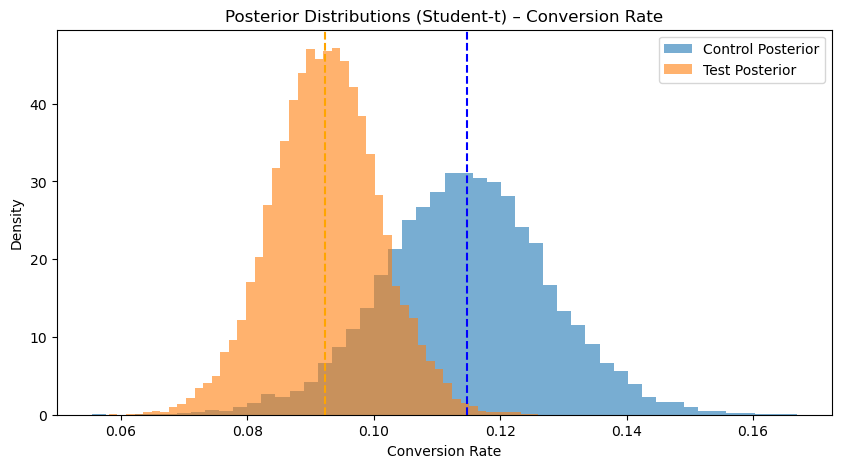

In [37]:
plt.figure(figsize=(10,5))
plt.hist(control_posterior, bins=50, alpha=0.6, label='Control Posterior', density=True)
plt.hist(test_posterior, bins=50, alpha=0.6, label='Test Posterior', density=True)
plt.axvline(control['conversion_rate'].mean(), color='blue', linestyle='--')
plt.axvline(test['conversion_rate'].mean(), color='orange', linestyle='--')
plt.legend()
plt.title('Posterior Distributions (Student-t) – Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.show()

Final Analysis: Statistically and commercially the Test underperforms: low probability of improvement (7%) combined with higher spend (+15%) yields worse cost-efficiency (higher CPA) and reduced conversion. Recommend reallocating budget to the Control, and running follow-up experiments focused on targeting or creative rather than scaling spend.